In [1]:
import tweepy
import pandas as pd

### Setup API

In [2]:
consumer_key = '41kQtMM8K3iVa9rJMrV2EheaT'
consumer_secret = 'MbJoePmBGFg0GMmBA79ZFxCRAddZh1pMsavPt3so37rmdgHu7r'
access_token = '757947804119695360-e1yB1Zvj2B673Aw5Wavlcnq5YQuYOU4'
access_token_secret = 'Sk62eIgyhoR7SmTpqygDpzq7HdBBRZqFDdmvScD0Vq27K'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [127]:
me = api.get_user(screen_name = 'CongresswomanSC')
me.id

1484252226646421505

### Pull Followers of Source Node

In [128]:
user_list = ["1484252226646421505"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

1542


In [129]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 1484252226646421505  #Set my user ID as the source 

#### Visualize Followers

In [130]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

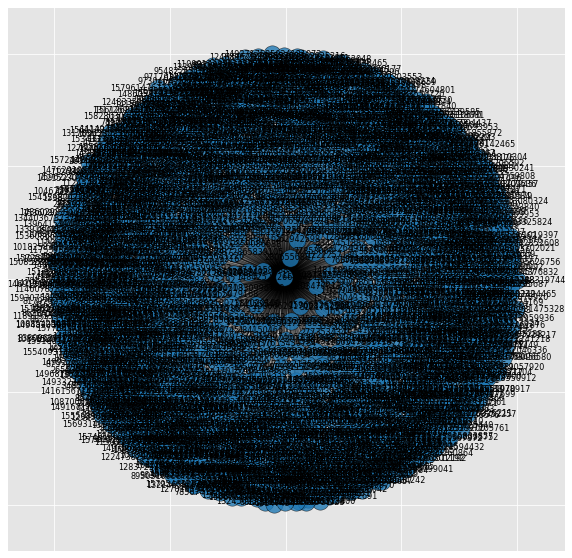

In [131]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

### Pull Followers of Followers

In [132]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    try:
        
        # fetching the user
        user = api.get_user(user_id = userID)

        # fetching the followers_count
        followers_count = user.followers_count

        for page in tweepy.Cursor(api.get_follower_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 500: #Only take first 500 followers
                break
    except tweepy.errors.TweepyException as e:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

1415487869393719301
141
100822546
591
1522272200207785984
1473028889387708423
21
1239967492463869952
3
1555237122499661829
1480187351615909893
13
107554601
error
1558126666936991746
1
1454187962216878093
1545466306119585796
1
1478731727933779971
14
408886596
352
1588146234975551491
2
816409796874268673


Rate limit reached. Sleeping for: 840


50
1463839347157970946
89
1016208806857134080
5
1572442653018492928
15
1340649974
32
401685604
error
3020254740
181
1404298877231042560
1138924105502212096
30
1442836904295206913
2937217401
66
1529968668033048602
3
3029244081
40
20994678
18
3093410745
5000
1126888785332121602


Rate limit reached. Sleeping for: 885


29
1460652362637496321
3
962116712001867778
254
434280621
25
1282178033663844354
error
1543506054063038465
8
1547221268939915265
3
1302850183663763456
85
362856856
218
728258966
1787
1500449175561019397
697
1589110554467373056
611
2593956154
370
895031095875575811
53
516964910
error
1567224363619086336


Rate limit reached. Sleeping for: 886


251
1397309642666041347
1076
1583586089289371651
177
914639884094029824
328
1113274176012464131
7
91300116
2222
59179684
5000
706900633
575
866345400608800768
126
1596297438981144579
24
127046202
1123
1160882553613627393
1808
32737534
1076
23381641
495
339578645
15
1552716385930846208


Rate limit reached. Sleeping for: 856


557
1577307758495662080
91
926532610830028801
39
1537202463287263237
12
2359086688
374
1324569334342066177
43
910549802269728770
65
1596612620781486083
61
1454941953452281858
2
1074407317217701889
32
1351314677754712066
24
22541195
973
22542909
1
1562756078475313152
248
95667069
928
1333956583362080769


Rate limit reached. Sleeping for: 885


93
2783086726
166
2710261666
103
1493323042956582916
error
1576759952563118081
7
1593019239123881986
602972071
256
1569647763998257155
13
1398330308215422984
22
1293227973966024705
527
17971015
4795
960583180150542338
118
1536080559411429376
16
175773846
337
1415697046548406288
19
1591001193106530306


Rate limit reached. Sleeping for: 884


150
1591154267255148562
2
27493883
5000
906165699302883328
240
837762259
109
1524904293312221188
error
2722732323
128
1279914598641086464
5000
1526237401336659970
1
268437371
720
1415405962412888066
612
356357165
229
197141427
210
1504623964374634497
1
127152065
609
45547298


Rate limit reached. Sleeping for: 886


error
221252902
19
565391150
223
1522253714962235394
1
1441229944877510670
32
36983444
491
2671700410
5000
705321336
83
1061252571350945792
1336
80943177
99
3003935413
267
417433146
5000
225155206
1
224100941
error
1706328649
682
1016646443963121664
244
1503003896222044165


Rate limit reached. Sleeping for: 882


132
1593353151565938688
102
337221042
1053
1500637069915402241
113
774268417
error
1089392298683756544
205
1358830067133124610
16
4720191211
80
2596936291
1
3057681186
5000
1451672686447452165
27
49182507
error
1530556425382109184
93
1159559995228336129
45
820863522863218688
368
1556788076952928257


Rate limit reached. Sleeping for: 888


3
1427065154253070341
1298016193853313024
4243
27746469
151
1146078784392708098
1674
1110192211
495
1629410749
5000
199120869
5000
1476291086012358662
22
1569770075305181185
1
1587160173814185986
9
1466849436936687617
47
1375109738258632707
508
58934779
error
1338858457491914752
error
1034847287078465536


Rate limit reached. Sleeping for: 887


1004
138589714
334
1590009356485107713
23
305643395
309
292011962
326
967942639797620738
152
1086662917028757504
13
1265107539672399873
38
1561845428471095297
4
1219029598672957440
343
1546838999720919041
28
1492717585024131072
54
1549922344260468742
12
201975024
34
1515025701828804612
9
1588265875873959936


Rate limit reached. Sleeping for: 885


4
180473747
error
1201279344309616641
error
4750744069
122
1246895294576459783
128
325972508
108
1528450935332249605
error
1485828164857253888
error
1188890308353888256
106
44368756
5000
1581478149250072576
3
1582472895288299520
2
1939370402
192
3244381050
141
329139035
218
879508843239178240


Rate limit reached. Sleeping for: 887


13
1496779608800309249
7
1084501836479057920
3
1397725724606357508
4
13447152
1081
1447412780664037380
3249
2950382610
30
1595156495552942086
3
1591119050330996739
1
1357123174232645640
1018
1016460574732046336
159
1571943822883540999
6
2310518618
103
963036265263267841
36
140089136
134
2413452114


Rate limit reached. Sleeping for: 887


2238
1459356144951078917
78
1204918600433360907
106
209265675
5000
1411895161622339584
2
1167410850858196992
153
1427977218232356874
179
335104157
6
89361934
3054
2870594261
173
197163332
382
2236119860
3304
219753803
4496
423848068
error
958339112972554241
3
1229385363723935752


Rate limit reached. Sleeping for: 886


222
961590006
519
1021195307311345667
error
4826278774
39
1592396450
error
4745795414
283
1072492437350817792
1837
1592876824874434566
5
1043564826
199
1189191594215399424
240
2903276677
377
950574716
70
1554832709947600905
76228253
945
1347162463834431496
176
1533198466641448960


Rate limit reached. Sleeping for: 885


error
713453262796677120
421
947574904559415298
error
1094045496883269632
26
2737395013
235
1003334561034588170
168
3742158388
69
190406636
480
36285417
397
1545122888797257730
24
1496870730067320837
8
17764206
472
183857542
560
2152524196
1290
1443047231695826954
96
1096661380533551104


Rate limit reached. Sleeping for: 886


67
20440296
964
1321465307681218561
669
591367714
5000
2589463411
996
898565402346827779
5000
1453366840692858881
70
1574572045551091713
8
1486057194307133444
41
4573727781
1612
433034412
5000
1594731592190201858
5
1586158727165464576
error
16329199
5000
899919976114642944
22
1564691290838777857


Rate limit reached. Sleeping for: 884


171
1589056695614980097
40
137901227
5000
1586736181139709958
19
1522834923681374209
466
2201560562
2757
341713327
error
584508752
343
549230501
5000
18850526
1512
1502330958766301192
50
1067557913722568710
error
1345461797361504259
5000
1593075927424159744
36
32938679
error
1584398464439537666


Rate limit reached. Sleeping for: 884


786
2354022534
351
3054560686
161
783471419065667584
error
1559102107378401280
92
1592376410634690563
37
591468686
52
1579106980769169409
372
22080477
119
218658092
274
1590766769525985288
2
1584890280431554560
1641
847172126041948163
659
978429148111818752
2
16829780
4611
1524514671755251712


Rate limit reached. Sleeping for: 883


44
2598288674
4688
3058997802
61
1031291870
2190
1590734020131885056
75
1547939387618381828
125
1237237502
error
231341243
9
1477148329922412546
4
1267951731045998593
210
1063950926
2493
1590470431810658304
44
27683697
583
716587184
5000
2919788116
error
1461539452438949890


Rate limit reached. Sleeping for: 884


1266164569602494465
error
1587551717968809990
12
1478938033873428482
846035218578493440
197
3031160008
20
1505146734888075266
49
1410646837464338432
error
79090009
113
38692839
483
2518839660
627
502344718
7
1415335991787855881
546
1589533844151181312
142
931470567579975680
198
70134931


Rate limit reached. Sleeping for: 884


5000
1588682212001697794
23
2297828332
49
430194651
1482
1587460427503501314
269
3284970110
1711
4002451457
error
1585653212429918215
52
1498630595173400579
35
1561132466429124609
2869
1586938752525541376
84
1449830810782158852
222
2231692735
1858
18006853
2380
1492305690773368833
3
1586537882377936902


Rate limit reached. Sleeping for: 883


3
1585666168018407425
1449068422084501506
95
2497265394
344
1416482032742502405
495
971275297063690240
1102
1475925550581653504
42
1260234890261512192
3330
3242082194
4
574405888
5000
845109218214629377
69
874188306
546
35242966
2682
1508528244663988232
27
78624842
1687
798479496194228224


Rate limit reached. Sleeping for: 882


1961
1534791878473920513
415
1165917290
1251
1516618504304267271
134
2850189129
1261
1573500433376624642
10
1225620058904449026
77
1579546535372652556
21
1582803098535444480
13
69960371
710
292552239
5000
79773639
5000
1562591088598478851
62
457836328
1100
1369286595703173131
158
19489864


Rate limit reached. Sleeping for: 879


1096
1567320860683550720
error
2898423815
7
995854495950176256
845
28817015
5000
59294073
error
701545276805357569
214
1549502718913351681
1465
569561912
408
1524070348035080192
6
1580592982956425217
1155335864
5000
1212552259462025216
139
1325123016309792769
221
68208246
1022
1122272296981475328


Rate limit reached. Sleeping for: 882


8
1578564913420713984
121
1569774732211539970
163
1569653979419918337
32
1523094201042354176
error
1035561491343257602
3493
1574492117187104769
1
15147454
2690
1392231525702410245
39
838675039
3
1646632302
159
461340229
1221
806698074282295297
50
2773534341
15
1579541857872351232
14
91072248


Rate limit reached. Sleeping for: 882


1527
777251762654810112
337
1573713739580424198
68
1579614767773278208
29
1537302619
125
822826339413753856
6
1497963123965370371
82
1256742965583675392
41
1213569829182963712
420
914795144326631424
334
4518379413
103
1567192725946044416
31
175540236
error
1579574965308989440
9
204017150
50
1130314754730397697


Rate limit reached. Sleeping for: 882


26
1543003845143445504
1365021169787817985
288
26346812
42
867451325436620800
24
1078362556476076033
5000
1263095299343556611
197
1498501369950621697
7
779407973986734080
253
3021758840
363
1576619698590044167
5
1578340158558060545
239
1538297255375122435
64
1063081826011529217
error
501274103
5000
1350303732156739585


Rate limit reached. Sleeping for: 882


72
707589582
434
1439386674488877057
10
1564555252505792512
85
1233006505026375682
181
1574918922658320384
1259941411094507520
44
1405125394160889859
53
983780934121123842
8
1477657048506634242
1003385076523159554
3
1557405904680648704
13
116614012
394
1546586254166433795
4
1284855201099390976
174
965345906102071298


Rate limit reached. Sleeping for: 880


332
256312536
1836
834255529543421953
68
959557324372430848
5000
779714208
5000
1353788260078809090
704
199392938
1772
19800897
891
1370495083062177793
5000
370842965
722
551875889
7
1366056641670635520
2
716711047177043968
223
401067161
5000
26157014
32
3410130973


Rate limit reached. Sleeping for: 880


1726
1457083383436152834
1
1320872518790598660
7
1575861881536860162
7
467924781
5000
104972390
573
1388184828642832393
693
40550745
5000
749131959863877632
137
1573095926608105472
383
1091690433355370496
247
701475447410806784
183
591959555
203
3317547947
812
917576346
114
760669952500260864


Rate limit reached. Sleeping for: 880


error
1124546358944440320
172
112428640
233
1521543040283906049
6
1015014377693556743
224
1259375473349529602
17
2806556887
87
119735883
259
41409249
886
2970544223
30
1056586015744364561
28
1000992666
560
1422332494003810304
2
1516987964257153025
79
213425101
2533
378227170


Rate limit reached. Sleeping for: 880


2858
1041495985413746688
40
1568245376532062212
20
2268011884
30
781489266069213184
45
339256182
428
807457584219361280
4284
623397218
error
1474907259465515009
58
817527133975232512
53
1117646293
215
32487015
2028
19204684
106
728165701458886656
28
84853923
188
770691643


Rate limit reached. Sleeping for: 880


614
1030683536406269952
4387
928540129
2009
1066037543915962369
error
1082684575111962625
2359
81241849
1285
2193186299
716
1013557994515320834
266
796051779247108096
132
1019410383969443840
39
409987920
52
1570861537555877889
12
1345186737568550912
172
1262459828728979457
253
457572682
error
2417981500


Rate limit reached. Sleeping for: 880


1100
263240535
5000
490341513
31
2324627286
63
974412129657790464
8
164065763
1828
1063062616623472640
375
3301104286
616
479105850
error
1396415394030759939
22
912057354031681536
66
148180133
766
1295108414440382466
26
32657404
103
2475271136
5000
165101991


Rate limit reached. Sleeping for: 878


4600
18941670
5000
1109917335618502656
249
1275835021077745667
695
1071001777
5000
1267928104250597376
error
3552129373
76
161330038
error
1283723284610273281
46
1029340994683191296
3010
1032465109959041024
1187
29462686
269
2250858631
657
915378317758431232
780
1561082146797805570
461
1576553072825868288


Rate limit reached. Sleeping for: 877


61
49533255
919
12561082
5000
1129599504
144
1123600375150518278
16
1458604232672747520
9
1151847844501999616
3
1577797304098213888
300
31223081
516
1505136055107862531
error
1525696605583720451
5
262300948
1819
1561268151924424711
751
1576745774204977152
30
779694555281100800
2
1539338262644391936


Rate limit reached. Sleeping for: 878


72
1201938183908462593
189
1566475098143563779
18
823376627912626180
33
411040626
5000
1123567690726166528
1653
456909449
error
1046759779773927425
5000
1388535902188806149
63
926542286711939072
166
273351656
498
737685697717489665
49
1476001761265520640
633
999119781298028544
103
2293131060
5000
1499914125694144512


Rate limit reached. Sleeping for: 877


13
1573122579195482115
3
14558971
815
1305711310437601281
11
455752813
220
246029855
69
1572975217663778817
112
1569196548147363840
244
1183534599454023680
503
3893534259
285
1268937798888951809
18
22859297
21
1570596551424376832
187
32920933
37
1572806543955079168
28
963551615142817792


Rate limit reached. Sleeping for: 877


202
1567950017037737984
238
944944896233926656
51
1110012027517526016
49
36567755
83
475134124
error
775243055964102656
630
23787399
error
274247352
15
19012462
error
1571136142128418817
149
1566561292105633792
5
3467753669
7
973046496277889024
42
14425183
558
1498425463617867779


Rate limit reached. Sleeping for: 878


15
1414081811555180547
30
904576104
148
1317988660512509953
23
393142907
76
1573038615453630469
18
1562437811344916480
51
1272526973428994048
10
1360619097470492674
141
1570817343281930241
63
40787574
228
1572578877599350784
3
1568972620334333952
50
1074129612
5000
1460359863050158082
274
235647413


Rate limit reached. Sleeping for: 876


239
1339180413315657728
90
1570276628902871041
77
163570705
5000
1569314099972153351
39
1118409120
77
1421649007
138
23498591
3
1173710617
1218
1323614835192537094
error
1445330026036137985
16
246893659
117
212438747
547
32714443
172
1572224990765891585
55
1512324864337608706


Rate limit reached. Sleeping for: 876


error
1507538086422622213
9
1568479650200059904
122
1530015462674800641
error
1563172157105979392
98
36000252
300
269341335
188
17762316
1706
1570932864270700545
16
1223502428890255361
25
1378769673026633730
19
1403761389454364678
123
455805322
269
1085032911324229633
606
1552462591154200576
32
1571887596971622402


Rate limit reached. Sleeping for: 874


error
806906355214852096
5000
1572658215313080324
32
389840566
5000
838527518143561728
63
1525914968239050755
42
18344104
5000
1343813709068689410
error
248735463
5000
567508925
5000
1052896620797460481
5000
38254095
5000
188019606
5000
816157667882373120
5000
381152398
5000
1079769536730140672


Rate limit reached. Sleeping for: 875


5000
1222257180
5000
3122099613
5000
1069636653353000962
5000
1092979962
5000
3044993235
5000
1080277407867772930
5000
140519774
5000
1083472286089396224
5000
245451804
5000
950783972
5000
85396297
5000
823552974253342721
5000
1348683154815655940
5000
1080885078425784320
5000
1260172386


Rate limit reached. Sleeping for: 871


5000
465132520
978
161791703
5000
23600262
5000
798973032362606600
5000
1410590874
5000
2968451607
5000
1078771401497161728
5000
1096610144077508610
54
475886266
43
2625408867
114
1550333097610285058
712
354300504
826
1350242936
285
1251549173457006594
91
1445532389640261636


Rate limit reached. Sleeping for: 870


1983
896735386109693953
231
139254476
2880
1259766002239238144
126
949277404991754240
164
1572256599917330433
64
1534333822313144321
51
1569719424680366082
error
1401572961597890566
17
1266235376382775304
1426296675010818063
44
298649065
5000
1525928313880838145
633
211393883
error
2962868158
5000
377773483


Rate limit reached. Sleeping for: 868


5000
76403083
5000
1527327850600095752
560
1297544762015326211
2
262942598
263
1514613068684161034
5
15987376
5000
1341075933290180614
10
4859004271
393
772430100
3632
16623088
358
1018258321139208192
229
2203470013
5000
1566831062403227648
4
1563577005299630080
40
1447072516501958657


Rate limit reached. Sleeping for: 861


31
1459586006684999684
27
1633464739
40
1531410390491533313
48
1564991191984349184
94
2290498633
13
901073333797736449
30
1553100513197150208
1448
1526390130671599620
11
1191448709135028224
43
1539562070336733184
22
1562966416872972289
1119202790952329216
115
39910286
2898
1563150906014568449
1
1563372651896197120


Rate limit reached. Sleeping for: 868


43
2884579084
error
838096291775275009
847
1563189524867723266
2
1025016687165415425
115
1553899606798393350
17
1552325124082307079
789239000670142465
error
1201895696540016641
1
1520127763138719745
error
3367993007
871
134440544
1283
14083602
1513
1175573460334055424
5000
705472772
508
1214025956


Rate limit reached. Sleeping for: 866


85
1189519445372362752
78
2947867541
176
1029105800210472960
2043
1468882839538216960
200
1333895974742347777
46
1166547881718775809
43
1485041784317259777
17
1094234872774828038
3792
1540328435070820352
1
1198384543369252864
97
611325724
418
1414634412612984835
316
217000520
583
892202016788938752
6
1551469653636947968


Rate limit reached. Sleeping for: 857


202670158
error
1555689892662968320
61
1456000621539217411
error
1487496490331344904
5
959417364810031104
4472
94672996
error
611632922
5000
1292794305556500488
157
117213468
2541
45720451
error
3144097733
1636
486801537
5000
168170088
5000
1525777238431567872
60
1442548149151666188


Rate limit reached. Sleeping for: 851


4376
1560124315965833222
6
1560050492855578626
40
1433810571904888836
61
1450233674742439937
504
1206094776677761024
120
2798507883
212
1553030633102127105
117
704635903264759808
379
1232508214215938048
1820
1231440697141624832
2092
1393985505314840579
301
1165930726765805568
error
504914414
76
1167367282227654656
2
1515109336284024838


Rate limit reached. Sleeping for: 852


1005
1417605833689534467
289
230903840
764
42437520
468
1503691564438237189
197
1324807550919999488
39
2898242417
5000
1536432407079006214
317
1002158887271886848
300
1420001517550149632
372
1556373566882562048
46
128562346
1617
26238155
error
1557402304768352257
426
984097542874058754
142
66936483


Rate limit reached. Sleeping for: 817


595
2646494184
1115
1203293294979096580
64
1562089508
907
2492382132
474
919184401
93
26250390
1453
16850792
5000
1432818629175922691
857
1276403757224546304
5000
545216917
219
1553396132906053632
7
1385424462468763656
46
37417172
8
1498713037666144258
914
3131329155


Rate limit reached. Sleeping for: 858


error
1684336572
1995
1554093148099461122
12
885209934689968130
1145
15262837
709
175975128
error
1405939192627142661
198
724878422
error
850970477023461376
414
27956023
error
398850045
5000
1037634415
error
882771194797326336
273
48882164
5000
781288781819371520
55
302396200
606
700460959039627266


Rate limit reached. Sleeping for: 863


345
4138844062
1487
1955411
error
1295131618185637888
1542
2463962562
164
1242367538
50
1547336529344974848
22
804330665520963587
error
1460190930
3125
3239236105
3565
844034178324877312
1229
802497334785490944
1626
1547620141856202752
38
1671110563
377
1549888269768327169
83
48617498


Rate limit reached. Sleeping for: 854


4565
17015207
1206
1534700968432254976
113
816833925456789505
5000
1428821807382020100
583
1963553718
1921
944969396
912
1532942129709711361
error
1451104908
95
1405578892790976512
79
742425996217946112
189
1034854686090772480
97
759622477437931524
error
1079061579973439488
5000
1544405512334221313
2
141778931


Rate limit reached. Sleeping for: 859


172
213380154
5000
1548862768257929217
error
32775262
1415
1546489747165614080
9
1880674038
5000
1270155546499268608
5000
174123548
error
705226776130293760
error
1540078642834931715
182
1516857126219440129
71
34402366
1968
1123562259744055296
error
1046774842702352384
342
72363151
5000
1285034689279823872


Rate limit reached. Sleeping for: 855


19
907311415459028992
97
1448486891238592520
26
233783568
5000
1532214238139531264
70
459955315
469
707977338282254336
281
473265732
2390
2171052229
2142
1327801207168118784
285
214307033
193
1545850458178260992
9
1545484514029445127
23
3406224245
358
174683908
135
705259753837092864


Rate limit reached. Sleeping for: 850


877
1545268047195283457
3
1545117462642839552
5
83376276
235
192441406
error
799554278
error
175642863
2126
245702590
151
1290908593089372161
23
707348082
error
1179561912645894146
561
1540775022381244417
1602
23342842
415
1542232337999609858
14
81905312
error
1543371966182301696


Rate limit reached. Sleeping for: 857


34
1316493816598233088
61
1542639090096652293
14
1518679399062777857
17
1339913718545735687
8
1352760304271241218
4502
871028127761285121
317
913101299029291009
47
1527157337613430784
24
1196249316
89
1333524012366966787
132
21960083
error
1541750287966371845
12
1513247214394658823
17
136439851
116
57951773


Rate limit reached. Sleeping for: 854


1638
1469781885966561285
4
93783830
2656
1540436195137753088
5
865353222
404
817076257770835968
5000
120297506
944
103968100
2586
2346960298
65
2315905201
112
967449423168114688
723
1414921401627287555
8
18653094
418
14749048
error
163287341
587
1511821004426911744


Rate limit reached. Sleeping for: 854


3
1506250511971926023
39
1381701298257547265
584
1537579025744404481
499
1513272829176946695
1
192758932
389
525728817
2070
1488378950539751424
8
1248335233218314240
9
1508237646115622914
51
1224738299006390272
2
1421460767266717699
540
36385722
184
1536780746114977794
3
3506103441
5000
1509148901110165510


Rate limit reached. Sleeping for: 836


5000
1049161774619152385
error
1536122730810068993
2
1528119060973625344
error
1536086678972112896
38
1097010026
11
1464650469406617606
24
1264285206594322434
5
1057606916170493952
79
1112565140761833473
299
354432927
892
786368310669488128
18
1535603373617078272
2
984836216305614849
40
621124127
182
25554841


Rate limit reached. Sleeping for: 839


978
1465790238
5000
827616929351352321
55
42920554
5000
29759588
106
82728960
error
753584452417224704
522
1534619383921778690
1
938811836148928512
445
360416633
168
1416156714324447232
36
892262754
166
4727987847
573
1483079645625004041
53
1516262475884371968
error
41873011


Rate limit reached. Sleeping for: 858


1549
28827600
1002
299709578
112
1431452268
294
1045190572842078208
error
1533530293159829504
206
1489233855856971776
198
888191407
5000
540061879
366
1261135253097205761
4
19948383
4286
1500877896860282883
613
1523425070361849861
71
1486833178023190530
1
436335782
2534
3909007282


Rate limit reached. Sleeping for: 850


131
14372270
5000
21943875
275
896017268852830209
1040
469581968
414
971763726977257477
179
24786066
374
2658087235
265
1081565917904101376
20
1522244072089391105
29
571759989
142
425513372
5000
540877897
831
1043996891401400320
140
1533978014
44
942932712


Rate limit reached. Sleeping for: 840


error
410324714
1253
1277963228518072327
129
1528864034803556352
15
1317836380731404289
91
43963249
5000
1651383812
error
1256276643758383107
6
1412726651457314820
598905236
279
23333998
5000
961300940
3790
23703429
433
214158576
error
47199194
42
545639548


Rate limit reached. Sleeping for: 859


error
67095221
5000
456552048
76
1295383801347047428
64
28164937
23
1354155660951347200
208
2512712266
316
2778972073
2228
1315051017499807744
127
1285744604709609472
667
1313424913
5000
1255997084
error
1515451761942794244
26
2717937088
450
853029302429986816
35
2495641226


Rate limit reached. Sleeping for: 859


130
1351697777202524169
1404
1523344562495926273
error
1427353425876963346
error
1489866413795799041
26
1162135337616982016
18
861611548250394624
5000
1340652238327468033
440
809699066
61
609880296
683
33935084
5000
1286001225083826177
1
1518924528667222024
error
1486899064889167873
276
316052330
57
1453337007225180161


Rate limit reached. Sleeping for: 860


error
1148026393
787
28178538
error
172360576
4111
2801989732
2595
145271964
1265
284264331
331
17536658
1665
1518677831680724997
error
1520917361079078913
12
308265571
60
559920836
586
3023213673
171
1518679004563357700
12
274605254
4905
1481084464801501184


Rate limit reached. Sleeping for: 862


41
1508535883712143364
10
1518737626383192066
148
1681960663
644
18649875
1172
14587949
5000
1516400082303827972
error
1354799395632504834
373
24913074
5000
4098211697
76
1518273621638135809
3
1517226036718678017
6
1031380454404972545
error
1477925349606395904
50
233088988
1974
815260641250291712


Rate limit reached. Sleeping for: 844


417
77853009
5000
710563241584410627
error
134991512
1155
1425512372865839105
3181070083
854
3236841337
45
1276209702322438148
4468
1397725068738826240
5000
1513218784009637888
233
2307219151
5000
1499226091898249223
429
1513938791593136132
289834244
error
1463991559783862277
64
112366416


Rate limit reached. Sleeping for: 855


1586
26816859
602
20317002
5000
775904915076120576
121
2969637076
502
1134087855037394949
30
460639863
129
1348437255396974595
162
1389267308556820481
33
1480240587920052226
error
16187637
5000
1511337594705133572
10
112770558
274
86133628
5000
1035664359329091584
error
1506624175586222091


Rate limit reached. Sleeping for: 858


error
1509264987264622600
15
783312649132056576
2
1306654918380605440
1486029831074717703
3371871917
error
3824284156
1478
17494693
50
1509816176037314561
5
1581258332
6
181859006
33
318135561
168
1498956616913211392
272
1185572808283303936
21
47402168
5000
23607474


Rate limit reached. Sleeping for: 858


error
43704578
error
1220768408008110080
error
18120905
5000
1536598688
36
83066606
566
305216911
5000
49150837
424
1395224901905178629
error
234014087
5000
1251572776420458504
662
872760673
153
823526939944251393
1135
1344036787371601921
60
2904232353
4
1051995322208178176


Rate limit reached. Sleeping for: 864


132
1420504512930975749
139
1500936043301851144
1
1390371422074281985
14
297709898
error
1506601346212020234
2641418717
17
1156659191228096515
2
596782151
2466
1057376677234462721
439
4509481402
183
274619046
5000
1502714913566994437
161
40506607
6
933523147
5000
2355633376


Rate limit reached. Sleeping for: 855


757
1037800539801702401
715
202227797
5000
747947940262584320
1008
201796542
53
109924118
1078
807744947021611008
182
247149579
985
852099253
12
1167466500774604801
443
219804150
368
862845853316284416
8
1214199720442073088
158
172765696
44
1436826478583365641
392
3120639929


Rate limit reached. Sleeping for: 856


error
558187027
49
1445228310460518400
148
312134473
5000
1426883368399085571
1399746630891487235
4166591333
295
1077121945
5000
360054100
25
28922763
error
1502749507251015684
65
1494830098742140930
184
1009554502679179270
error
1041574519
304
1279857935942852608
275
1455702803603668997


Rate limit reached. Sleeping for: 839


2
1031323122
error
3279807859
1463
768618331603603456
1218
1553926891
3829
1080342704196894720
143
1196342273937682432
340
760218931
5000
1350798991831797763
183
1000837608648462336
158
2567442278
error
358121495
1935
312175228
4926
1192901611116519424
49
16217359
610
25761352


Rate limit reached. Sleeping for: 852


390
256740715
388
954822631039086592
371
810869521
696
220848782
19
1118048641149624320
463
610134792
5000
2289601502
17
210789680
726
1437126113004818440
188
1496316335164469253
error
1494081670458359808
6
221957443
425
1503390098880143361
111
2591675300
1716
2234544708


Rate limit reached. Sleeping for: 815


306
1080573351914061825
5000
582037089
2648
1503940725087641603
45
24195214
5000
1082427779583541248
5000
3120758042
97
74173497
4405
1346205046036377601
4921
1503184943366774787
979479912666058753
error
1470855762897375232
817
966916916605431811
error
1099801422340726784
331
1102627643139284997
443
213285521


Rate limit reached. Sleeping for: 857


327
2153468676
4163
1359573330555248641
11
1086504846163959813
20
3024062870
error
1092563651297464320
107
37643766
257
3169027770
1450
1421523073258426368
152
918547149721358336
1465
830096088
5000
1387876793076572172
34
1224421162765123585
55
1493672402793877506
3
1480309166593875969
49
724736791614488576


Rate limit reached. Sleeping for: 844


2630
498817018
1702
1102633186289303553
63
18247918
671
1398597182
229
84645710
error
1088542563861258246
217
1249086681493442565
5
257763043
5000
1370669006
59
47844743
115
1480986497281146883
11
473637671
5000
898365310272770048
error
1494397213879025664
41
1254094996489281538


Rate limit reached. Sleeping for: 850


193
2724095695
5000
1240780795142340609
8
2770543959
980
852816411218989056
3
18963450
482
104568973
error
710273479665266689
127
1490830573849481216
65
925219829040197632
154
339602124
134
1095373650201661440
591
76370593
734
1095874678890074112
582
226637135
138
2345451882


Rate limit reached. Sleeping for: 847


167
1362970048063807491
115
22529203
5000
125344643
122
938893806
14
234208356
error
1055104263012147201
138
287693442
109
1443997964444307459
226
50377701
2132
1042750850203103232
3126
772476020
1457
988942485828308992
5000
703218802
error
1138264199556206592
94
938951458321522689


Rate limit reached. Sleeping for: 834


error
1494798371688755203
1497663104083234816
26
1231137345358921728
12
338092578
82
1461685768364171270
39
33062369
error
271092205
5000
907985503118663681
223
3824077398
134
2821023022
117
770090036
25
561287238
2503
1377854153293238273
210
1007115168273371138
260
2318385202


Rate limit reached. Sleeping for: 851


1361
186180475
5000
3027286779
4474
1498867659420491780
1
1220023394315440129
669
1571660059
927
846855486330810368
287
1079555524947898368
181
1284857311148859398
69
753120328675647488
error
389605701
118
1491729408943702021
786
1222319028875644928
310
1068685149292904450
675
15987296
5000
73230943


Rate limit reached. Sleeping for: 844


475
890675418780618753
5000
1125628917124145153
125
3219286745
406
1488206780186431495
25
1144461670707650562
2511
1317269984301797376
269
1110068737476952064
error
1494385557895626756
error
1480925084508467206
174
1291941149788319744
11
139730062
3405
2761223552
80
810225832585297920
5000
1401676423455293443
1336
1623720398


Rate limit reached. Sleeping for: 851


12
1485360961246617607
32314377
5000
1483428824461287427
63
779426536587919360
1011
1491977791
21
2348875942
24
1137989321963839488
156
1263629233
2136
1460085573012660224
1
934404772593045505
163
1413919447451148292
155
1295582794735923200
1213
1083363572070133760
error
1359530197045960713
error
105984477


Rate limit reached. Sleeping for: 845


error
825291290141159424
9
917128213540868096
10
1282830556628221953
error
1492545297695784963
2
1482359874432471048
6
1438509050518376459
193
1144313320125714438
9
1470193464038019074
40
1481437025563820040
error
1470966667127795713
6
605087325
3
182922748
19
1216110500024594432
4
1179430522122113025
117
1413312009312034818


Rate limit reached. Sleeping for: 847


2
1091785413306580992
27
1145369236417761281
141
1019684281877188608
86
565079692
11
347334226
error
1043645381945507840
error
365989946
error
898285733315833857
162
158881586
51
1483396099293515776
23
238005716
51
784402172326936576
4
1490544774750822400
3
1473445951742304258
4
712712001714257920


Rate limit reached. Sleeping for: 850


8
196279526
2
472872166
27
1325985139906777088
3
1217194738186584075
58
1416842864227667975
4
1213520509389795328
13
949789378519289856
10
1284685716463726593
541
1489904080579444739
12
250426096
1756
1491671733748867074
2
1086914645384970240
46
15299132
117
1364233147131572225
29
3434041191


Rate limit reached. Sleeping for: 835


75
120204128
74
827997206766424064
37
1469121047886766084
27
1491847306123128834
84
1125459302616117248
error
1489260211726548992
11
983422237972852736
666
1491482019376816131
5
4162732961
13
73537573
4558
1423787003343167493
3
400463480
569
22012091
5000
3003380451
68
1412938768835878920


Rate limit reached. Sleeping for: 833


error
4787914355
error
1415149699963789312
error
1370735179971584003
error
869511559789371392
error
1074675487128125440
error
1087000194783346688
error
1244248354839834625
error
721128700754964480
error
68173067
error
784306404936982529
error
1176226138433212416
error
1461768416168235015
error
1097584387766579200
error
3301661105
error
1108728461991051271
error
1048473174
error
163553425
error
470330537
error
1425919056012513281
error
1482003759232430082
error
148917556
error
200733765
error
1136648320431120384
error
1428877277962637318
error
270156345
error
34678444
error
959640705214877696
error
1271037821441257478
error
1040320896
error
182110381
error
2205461579
error
827556313
error
1490431214469193730
error
484150466
error
1482352135480172545
error
1482764407570579461
error
1291789560838598659
error
374530345
error
125226778
error
1939552538
error
48860405
error
1481076727652757508
error
2183227441
error
177432706
error
1170078080653832194
error
1374050794182434818
error
13375544

In [152]:
# Construct Directed Graph

import networkx as nx

edge_list_df = pd.read_csv('../datasets/networkOfFollowers-Hedden.csv') #Read into a df
edge_list_df = edge_list_df.astype(int)
edge_list_df

,Unnamed: 0,source,target
0,0,1210627806,1565499318596952064
1,1,1210627806,1180133955187695616
2,2,1210627806,1449127446222188288
3,3,1210627806,2316443093
4,4,1210627806,1379982756986376192
...,...,...,...
860720,4995,45436858,1441975018502516736
860721,4996,45436858,1441946633831288832
860722,4997,45436858,1411344846372147200
860723,4998,45436858,1441931168711016448


In [153]:
G_directed = nx.from_pandas_edgelist(edge_list_df, 
                                     source = 'target', 
                                     target ='source', 
                                     create_using=nx.DiGraph()
                                    )

G_directed.is_directed()

True

In [154]:
G_directed.number_of_nodes() #Find the total number of nodes in this graph

740020

In [155]:
#Highest Degree Nodes

G_sorted = pd.DataFrame(sorted(G_directed.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

,nconst,degree
0,37728789,5044
1,45436858,5034
2,16248319,5031
3,372262602,5029
4,23834147,5028


In [157]:
#Exclude nodes with degree less than 10

G_tmp = nx.k_core(G_directed, 7) 
G_tmp.number_of_nodes()

2581

In [158]:
print(G_tmp)
nx.write_edgelist(G_tmp, "Hedden.csv")

DiGraph with 2581 nodes and 24665 edges


### Get Node Attributes

In [159]:
verified_dict = dict()
follower_count_dict = dict()
name = dict()
screen_name = dict()
location = dict()
profile_location = dict()
protected = dict()
friends_count = dict()
listed_count = dict()
created_at = dict()
favourites_count = dict()
geo_enabled = dict()
statuses_count = dict()
lang = dict()
contributors_enabled = dict()
is_translator = dict()
is_translation_enabled = dict()
profile_use_background_image = dict()
has_extended_profile = dict()
default_profile = dict()
default_profile_image = dict()

i = 0
for node in G_tmp.nodes():
    print(i)
    i += 1
    user_id = int(node)
    try:
        user = api.get_user(user_id = user_id)
        follower_count_dict[user_id] = int(user.followers_count) 
        verified_dict[user_id] = user.verified
        name[user_id] = user.name
        screen_name[user_id] = user.screen_name
        location[user_id] = user.location
        profile_location[user_id] = user.profile_location
        protected[user_id] = user.protected
        friends_count[user_id] = user.friends_count
        listed_count[user_id] = user.listed_count
        created_at[user_id] = user.created_at
        favourites_count[user_id] = user.favourites_count
        geo_enabled[user_id] = user.geo_enabled
        statuses_count[user_id] = user.statuses_count
        lang[user_id] = user.lang
        contributors_enabled[user_id] = user.contributors_enabled
        is_translator[user_id] = user.is_translator
        is_translation_enabled[user_id] = user.is_translation_enabled
        profile_use_background_image[user_id] = user.profile_use_background_image
        has_extended_profile[user_id] = user.has_extended_profile
        default_profile[user_id] = user.default_profile
        default_profile_image[user_id] = user.default_profile_image
        
    except tweepy.errors.TweepyException as e:
        print("error")
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
error
49
error
50
error
51
52
error
53
error
54
error
55
error
56
error
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
error
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
error
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
26

Rate limit reached. Sleeping for: 513


901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
error
927
error
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
error
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
error
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
error
1055
1056
1057
error
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
error
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
11

Rate limit reached. Sleeping for: 559


1801
1802
1803
1804
1805
1806
1807
error
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
error
1831
error
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
error
1863
1864
error
1865
error
1866
error
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
error
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
error
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
error
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988


In [160]:
follower_count_dict

{1463477257222062080: 573,
 1405439623317405696: 156,
 877879626965581824: 449,
 704257242858708992: 1410,
 882656680487550976: 429,
 730578170622042112: 231,
 174145542: 29269,
 1105531614459715584: 132,
 2644910088: 608,
 772115981430816768: 406,
 3086950408: 9744,
 1166299472231579650: 160,
 566337543: 295917,
 55508998: 749,
 1401045002: 7386,
 21389328: 25198,
 353058834: 808,
 47030292: 207792,
 873226260: 1160,
 2263703576: 16911,
 114565156: 15368,
 27484203: 524,
 62554155: 516308,
 326352942: 1582,
 39108656: 5899,
 50774064: 237128,
 1133289522: 529,
 384032818: 4885,
 182911027: 9384,
 120397874: 367,
 565534774: 581,
 254066744: 1281,
 11673662: 257614,
 15245376: 128629,
 930127944: 342,
 278855754: 37445,
 816652364: 513,
 44425296: 14832,
 81240147: 1491,
 2424135770: 490,
 3080291: 163,
 3282550890: 10755,
 31268972: 11025,
 14246001: 394358,
 27123829: 1064,
 4846338167: 1237,
 4853915772: 295,
 126673023: 11454,
 772703880132038656: 392,
 773558160774795264: 5013,
 8

In [161]:
G_test = G_tmp

nx.set_node_attributes(G_test, follower_count_dict, "follower_count")
nx.set_node_attributes(G_test, verified_dict, "verified")
nx.set_node_attributes(G_test, name, "name")
nx.set_node_attributes(G_test, screen_name, "screen_name")
nx.set_node_attributes(G_test, protected, "protected")
nx.set_node_attributes(G_test, friends_count, "friends_count")
nx.set_node_attributes(G_test, listed_count, "listed_count")
nx.set_node_attributes(G_test, favourites_count, "favourites_count")
nx.set_node_attributes(G_test, geo_enabled, "geo_enabled")
nx.set_node_attributes(G_test, statuses_count, "statuses_count")
nx.set_node_attributes(G_test, contributors_enabled, "contributors_enabled")
nx.set_node_attributes(G_test, is_translator, "is_translator")
nx.set_node_attributes(G_test, is_translation_enabled, "is_translation_enabled")
nx.set_node_attributes(G_test, profile_use_background_image, "profile_use_background_image")
nx.set_node_attributes(G_test, has_extended_profile, "has_extended_profile")
nx.set_node_attributes(G_test, default_profile, "default_profile")
nx.set_node_attributes(G_test, default_profile_image, "default_profile_image")

In [162]:
print(G_test.nodes.data(True))

[(1463477257222062080, {'follower_count': 573, 'verified': False, 'name': 'Magdalena Konkiewicz', 'screen_name': 'MagdalenaKonki1', 'protected': False, 'friends_count': 2266, 'listed_count': 5, 'favourites_count': 113, 'geo_enabled': True, 'statuses_count': 75, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False}), (1405439623317405696, {'follower_count': 156, 'verified': False, 'name': 'Dagmawi Minda', 'screen_name': 'EthiopianMan6', 'protected': False, 'friends_count': 1024, 'listed_count': 0, 'favourites_count': 513, 'geo_enabled': False, 'statuses_count': 520, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False}), (877879626965581824, {'follower_count': 449, 'verified

## Clean Node Attributes
Remove empty nodes and values with 'None'

In [163]:
G_clean = G_test
problems = []

for node in G_test.nodes(data = True):
    if len(node[1]) == 0:
        problems.append(node[0])
    #if node.data() is None:
    #    print("FAH SHOOO")

print(problems)

[997577991843528832, 985208035588038784, 1083789187931881600, 914297664480592000, 1019364362438361216, 961544622806917248, 1034822818817564800, 1017607414001164416, 1063162945050501248, 869529486529675264, 705781251139985408, 1266509317861040128, 1143404815462141952, 1192444711769903104, 1218939176135069696, 1287085854150791168, 739777783866494976, 950158106612220032, 815815930500390912, 851258722995142656, 1137430298461908992, 865270089150541824, 1258110317558673408, 915273489615028224, 1136075085851308032, 1346534062068908032, 740383734185250816, 702264132968566784, 877866713034969088, 698266570196439040, 882228286687989760, 942121866638053376, 861938310159192064, 994572684980818048, 22185860, 737590507866488832, 1098592941881340032, 747865710928531456, 1397080161250643968, 839127751894437888, 734081457212297216, 873196368629813248, 924013714222829568, 857770513015459840, 1185955112751157248, 919965964111933440, 1050818102911528960, 1397388564451655680, 1247151596108222464, 133302592

In [164]:
for problem in problems:
    G_clean.remove_node(problem)

In [165]:
nones = dict()

for node in G_clean.nodes(data = True):
    node_id = node[0]
    issues = []
    for k,v in node[1].items():
        if v is None:
            issues.append(k)
    nones[node_id] = issues

print(nones)
#nx.set_node_attributes(G_clean, new_info)

{1463477257222062080: [], 1405439623317405696: [], 877879626965581824: [], 704257242858708992: [], 882656680487550976: [], 730578170622042112: [], 174145542: [], 1105531614459715584: [], 2644910088: [], 772115981430816768: [], 3086950408: [], 1166299472231579650: [], 566337543: [], 55508998: [], 1401045002: [], 21389328: [], 353058834: [], 47030292: [], 873226260: [], 2263703576: [], 114565156: [], 27484203: [], 62554155: [], 326352942: [], 39108656: [], 50774064: [], 1133289522: [], 384032818: [], 182911027: [], 120397874: [], 565534774: [], 254066744: [], 11673662: [], 15245376: [], 930127944: [], 278855754: [], 816652364: [], 44425296: [], 81240147: [], 2424135770: [], 3080291: [], 3282550890: [], 31268972: [], 14246001: [], 27123829: [], 4846338167: [], 4853915772: [], 126673023: [], 772703880132038656: [], 773558160774795264: [], 821933283671937024: [], 259547274: [], 2788089996: [], 135233670: [], 165896337: [], 372252821: [], 4361928854: [], 2192408730: [], 16244891: [], 4425195

In [166]:
for node in G_clean.nodes(data = True):
    print(node)

(1463477257222062080, {'follower_count': 573, 'verified': False, 'name': 'Magdalena Konkiewicz', 'screen_name': 'MagdalenaKonki1', 'protected': False, 'friends_count': 2266, 'listed_count': 5, 'favourites_count': 113, 'geo_enabled': True, 'statuses_count': 75, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False})
(1405439623317405696, {'follower_count': 156, 'verified': False, 'name': 'Dagmawi Minda', 'screen_name': 'EthiopianMan6', 'protected': False, 'friends_count': 1024, 'listed_count': 0, 'favourites_count': 513, 'geo_enabled': False, 'statuses_count': 520, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False})
(877879626965581824, {'follower_count': 449, 'verified': 

(2319979261, {'follower_count': 1059, 'verified': False, 'name': 'Anouar Boukhars', 'screen_name': 'aboukhars01', 'protected': False, 'friends_count': 2776, 'listed_count': 31, 'favourites_count': 5637, 'geo_enabled': False, 'statuses_count': 3199, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': False, 'default_profile': True, 'default_profile_image': False})
(42300159, {'follower_count': 270687, 'verified': False, 'name': 'Burton Brown Sr.', 'screen_name': 'BurtonBrown', 'protected': False, 'friends_count': 290821, 'listed_count': 2857, 'favourites_count': 801, 'geo_enabled': False, 'statuses_count': 365684, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False})
(1538628432430522368, {'follower_count': 89, 'verified': False, 'n

In [167]:
G_clean.number_of_nodes()

2446

In [168]:
nx.write_gml(G_clean, "Hedden.gml")